# Exercice 2 - Time series in machine learning: Identify a user's significant points of interests.


Here we have a real life use case of an application used by real users. 

We have **GPS positions** of users over time, as well as their **checkins**, which means they communicated to the app that they were at a specific place, called **point of interest**

Run the code below to initialize the exercice.

In [2]:
%run util.py

df_points, df_pois, df_checkins = load_transform_files()

df_points = load_df(file_path='df_points')
df_pois = load_df(file_path='df_pois')
df_checkins = load_df(file_path='df_checkins')

There are 3 datasets:

- GPS positions for various users over time (**df_points**)

- Checkins of those users in various places (**df_checkins**)

- A list of various Points of interest (**df_pois**) in many places

**The aim is to train an algorithm that can infer if a user is moving or not, and if not, identify the most likely POI he or she has stopped at.**

**You can visualize the first 5 lines of each of the three dataframes.**

In [3]:
# CODE HERE

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,minute,second,week_day
0,1414.0,48.866839,2.356633,1.484216e+09,u-1,2017-01-12 10:15:58.321185000,2017,1,12,10,15,58,3
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502123000,2017,1,12,10,15,58,3
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771187000,2017,1,12,10,15,59,3
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834000,2017,1,12,10,16,1,3
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239000,2017,1,12,10,16,2,3


In [4]:
# CODE HERE

,id,latitude,longitude,name,opening_hours,rating,utc_offset
0,ChIJa6LNPgpu5kcRhgsb7MbmHw8,48.871987,2.366609,PRUNE DE NUIT,"{'0': [], '1': [], '2': [], '3': [], '4': [], ...",4.8,60
1,ChIJaVQu_JBx5kcRJfHbsRGxRB0,48.828229,2.350144,Cafe du Commerce,"{'0': [{'_1': 12.0, '_2': 15.0}, {'_1': 19.0, ...",3.8,60
2,ChIJ773XIjRu5kcRsQxQXK-vgjc,48.872883,2.329033,Ce 9,"{'0': [], '1': [], '2': [], '3': [], '4': [], ...",0.0,60
3,ChIJ75q8H_hC5kcRyqJmeICPr2Y,49.048217,2.336252,Morocco Restaurant,"{'0': [{'_1': 12.0, '_2': 14.5}], '1': [], '2'...",3.7,60
4,ChIJQ64x_xVu5kcRSExgSm4ySNA,48.871537,2.345781,Okinawa Sushi,"{'0': [{'_1': 19.25, '_2': 23.0}], '1': [{'_1'...",3.6,60


In [5]:
# CODE HERE

,endTimestamp,id,latitude,longitude,name,startTimestamp,user_uuid,start_datetime,end_datetime
0,1.485174e+09,ChIJET4koxdu5kcRDqbgGzGqwgQ,48.867692,2.347732,Frenchie To Go,1.485173e+09,u-1,2017-01-23 11:56:08,2017-01-23 12:15:42
1,1.484226e+09,ChIJN555Og5u5kcRjcUnjYZH6DQ,48.869159,2.357743,Ciacco,1.484223e+09,u-1,2017-01-12 12:13:55,2017-01-12 13:03:42
2,1.484744e+09,ChIJGa1T4RFu5kcRKOUy9OJRE-Y,48.870127,2.356441,Osè African Cuisine,1.484739e+09,u-1,2017-01-18 11:30:22,2017-01-18 12:46:57
3,1.487078e+09,ChIJN555Og5u5kcRjcUnjYZH6DQ,48.869159,2.357743,Ciacco,1.487076e+09,u-1,2017-02-14 12:32:55,2017-02-14 13:20:29
4,1.482457e+09,ChIJlyZ5jhNu5kcRbdaOx1mZ5Ws,48.872752,2.351954,Farago,1.482438e+09,u-2,2016-12-22 20:26:16,2016-12-23 01:40:20


# Description and plots of the data

Run the code below to config plot.

In [67]:
#Plot config
style.use('ggplot')
fontsize = 17
params = {'axes.labelsize': fontsize + 2,
          'font.size': fontsize,
          'legend.fontsize': fontsize,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize}
plt.rcParams.update(params)

**Write a function to plot the trajectories for each users, given their latitude and longitude. Plot.**

In [ ]:
users_shortlist  = ['u-1','u-2','u-3']

def plot_data(df_points):
    # CODE HERE
    plt.show()
    
plot_data(df_points)

The function below builds a figure that can then be displayed by "mplleaflet". Import the package "mplleaflet".

Make sense of the function and use it visualize the movements of user `u-2`.

In [8]:
import mplleaflet

def plot_data_mpl(df_points, user_uuid, color_col=None):
    fig=plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    sub_df = df_points[df_points["user_uuid"] == user_uuid]
    
    sub_df.head()
    
    if not color_col:
        ax.scatter(sub_df['longitude'], sub_df['latitude'], c="b")
    else:
        ax.scatter(sub_df['longitude'], sub_df['latitude'], c=sub_df[color_col])
    return fig

fig = plot_data_mpl(# CODE HERE)
    
mplleaflet.display(fig)

# The Haversine Distance

When calculating a distance between two points from latitude and longitude data, we need to consider that the earth is not flat, but spherical. 

The "Haversine Distance" does so by taking into account the curvature of the earth. Those geometrical calculations are combined in the "haversine" package.

**You can import the haversine package here**

In [163]:
from haversine import haversine

Create a function `get_haversine` that calculates the haversine distance between two observations of `df_points`.

In [84]:
def get_haversine(a, b):
    return # CODE HERE

# Filtering dataset

The feature `horizontal_precision` has some outliers. Filter out the dataset to keep only the rows in which `horizontal_precision` is less than 100.

In [71]:
# CODE HERE

df_points.head()

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,minute,second,week_day
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502122641,2017,1,12,10,15,58,3
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771186829,2017,1,12,10,15,59,3
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834496,2017,1,12,10,16,1,3
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239235,2017,1,12,10,16,2,3
5,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:03.594202280,2017,1,12,10,16,3,3


# Feature engineering

Feature engineering is the process of deriving new features from existing ones. In the section bordered with #'s in code below, engineer the following features - 

**For every user**
- Time difference between two consecutive positions of this user
- Latitude difference between two consecutive positions of this user
- Longitude difference between two consecutive positions of this user
- Latitude Velocity/Speed between two consecutive positions of this user
- LongitudeVelocity/Speed between two consecutive positions of this user

In [72]:
df_points["times_cen"] = np.nan
df_points["time_diff"] = np.nan
df_points["latitude_diff"] = np.nan
df_points["longitude_diff"] = np.nan
df_points["v_lat"] = np.nan
df_points["v_lon"] = np.nan


for user_uuid in df_points.user_uuid.unique():
    mask_user = df_points["user_uuid"] == user_uuid
    df_user = df_points[mask_user]
    df_user['times_cen'] = standardize(df=df_user, field='longitude')
    
    ############
    
    df_user['time_diff'] = # CODE HERE
    df_user["latitude_diff"] = # CODE HERE
    df_user["longitude_diff"] = # CODE HERE
    df_user['v_lat'] = # CODE HERE
    df_user['v_lon'] = # CODE HERE

    ############
    
    df_points.loc[mask_user] = df_user

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

Visualize the first 5 rows of the features that you just engineered.

In [75]:
# CODE HERE

,time_diff,latitude_diff,longitude_diff,v_lat,v_lon
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.269064,0.000023,-0.000039,0.000018,-0.000031
3,1.847648,0.000005,-0.000008,0.000003,-0.000005
4,0.975405,0.000000,0.000000,0.000000,0.000000
5,0.999963,0.000000,0.000000,0.000000,0.000000


# DBSCAN

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a fancy/scary name for a clustering algorithm based on geolocalization.

Sklearn has a DBSCAN package. Import it.

In [76]:
# CODE HERE

Within the below function, initiate a DBSCAN with the following parameters:
    - Epsilon  (0.05 / Earth radius in km)
    - 5 minimum samples
    - 'haversine' metric
    - 'ball_tree' algorithm
    
Try make sense of the rest of the code then move on.

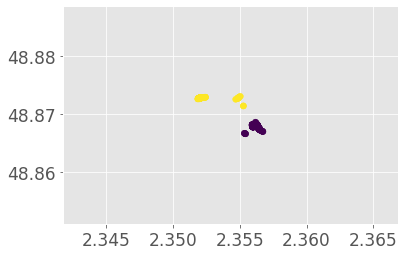

In [77]:
def get_clustering_res_dbscan(data=None, eps=0.05/EARTH_RADIUS, min_samples = 5):
    
    ##########
    
    # Initiate DBSCAN
    dbs = DBSCAN(# CODE HERE
    
    ##########
    
    clusters = dbs.fit_predict(np.radians(data))

    dict_res = {}
    dict_res['centroids'] = [0, 0]
    dict_res['n_cluster'] = len(np.unique(clusters))
    dict_res['model_clust'] = dbs
    clusters[np.where(clusters == -1)] = -100  # Non clustered data
    clusters = [int(i) for i in clusters]
    dict_res['cluster'] = clusters
    return dict_res

# This runs the DBSCAN algorithm on the movements of user 2
dict_res_u2 = get_labels_points(df_points, "u-2", fields=['latitude', 'longitude', 'times_cen'])

df_u2 = dict_res_u2["df_points"]

fig = plot_data_mpl(df_u2,"u-2","label")

**Plot the clustered movements of user 2 on a map**

In [78]:
# CODE HERE

//anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Discriminate moving and stopping candidates

We now have a first spatial (and possibly temporal) clustering of our datapoints.The next idea is to define a function that takes a cluster of points into consideration, and evaluates if the user stays **long enough** inside it. If so, it is a stop point, else not.

Have a look at the function below. One of its arguments, `min_time_clust`, defines the minimum time to be spent in a cluster for it to be considered a stop.

Complete the function so that:

- If user spends less than the minimum time in cluster, he is considered moving
    - set the user as being moving (stop_move=1)
- If user spends more than the minimum time in cluster, he is considered stopping
    - set the user as stopped (stop_move=0)

In [ ]:
MIN_STOP_TIME = 60
MIN_STOP_PROP = 0.8
def label_stop_or_not(df_points=None, user_id=None, min_time_clust=None):
    """Given a clustering, will look the time elapsed
    between entering and exiting cluster.
    if too small : moving.
    else: will request check-in,
    assumes it has  a label
    stop_move = 1 if moves, 0 if stop"""
    """
    Heuristich function, that labels GPS points moving (1) or stop (0), looking
    sequentially at time difference between points.
    We have to do this because a user may do several "visits" in one cluster.
    Inputs:
    --------------------
    df_points: pandas dataframe, gps coordinates for users.
    user_id: user to perform algo on, str. exp: 'u-1'
    min_time_clust: float, minimum time in second to spend in a cluster to be
    labeled stopped.
    Outputs:
    --------------------
    """

    if user_id not in df_points['user_uuid'].unique():
        raise ValueError("Should select appropriate user_id")
    mask_user = df_points['user_uuid'] == user_id
    df_user = df_points[mask_user]
    # prev_row = dfu.ix[0]
    current_label = df_user['label'].values[0]
    time_elapsed = 0
    indx_start = df_user.index[0]
    df_user['stop_move'] = 0
    # Take in consideration previous cluster
    
    
    ################# COMPLETE SECTION BELOW ###################
    
    for indx, row in df_user.iterrows():
        if row['label'] != current_label:  
  
            if time_elapsed < min_time_clust:
               
                df_user.loc[indx_start: indx - 1, 'stop_move'] = # CODE HERE
                df_user.loc[indx_start: indx - 1, 'time_elapsed'] = # CODE HERE
            else:
               
                df_user.loc[indx_start: indx - 1, 'stop_move'] = # CODE HERE
                df_user.loc[indx_start: indx - 1, 'time_elapsed'] = # CODE HERE
            time_elapsed = 0
            indx_start = indx
            current_label = row['label']
        else:  
            time_elapsed += row['time_diff']
  
    
    ######################## END OF SECTION ##################
    
    
    if time_elapsed < min_time_clust:
        df_user.loc[indx_start: indx - 1, 'stop_move'] = 1
        df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
    else:
        df_user.loc[indx_start: indx - 1, 'stop_move'] = 0
        df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
    df_points.loc[mask_user, 'stop_move'] = df_user['stop_move']
    df_points.loc[mask_user, 'time_elapsed'] = df_user['time_elapsed']
    return df_points



Run code below.

In [3]:
%run util2.py

In the function below, set the minimum time spent in cluser to be considered as 1 minute.

In [ ]:
df_points, dict_description_clusters = stop_places_labelling(df_points=df_points, user_id="u-2",
                                                             quantile_diameter_cluster=0.99,
                                                             min_time_clust=# CODE HERE)

In [49]:
df_points.head()

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,...,week_day,times_cen,time_diff,latitude_diff,longitude_diff,v_lat,v_lon,label,stop_move,time_elapsed
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502123000,2017,1,12,10,...,3,0.227940,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,528308.900209
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771187000,2017,1,12,10,...,3,0.214384,1.269064,0.000023,-0.000039,0.000018,-0.000031,0.0,0.0,528308.900209
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834000,2017,1,12,10,...,3,0.211429,1.847648,0.000005,-0.000008,0.000003,-0.000005,0.0,0.0,528308.900209
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239000,2017,1,12,10,...,3,0.211429,0.975405,0.000000,0.000000,0.000000,0.000000,0.0,0.0,528308.900209
5,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:03.594202000,2017,1,12,10,...,3,0.211429,0.999963,0.000000,0.000000,0.000000,0.000000,0.0,0.0,528308.900209
